In [1]:
from datascience import *
import numpy as np

# These lines set up graphing capabilities.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# By the Numbers

Many questions about the world involve numbers in one form or another. Some of them have concrete numerical answers, such as the average size of a Berkeley class. Some of them don't, but their answers are based on numerical evidence, such as the number of years a newborn baby is expected to live. A key objective in data science is quantifying that uncertainty. Welcome to Data 8!

# Tables, Causation

## Causation

An **observational study** is when a researcher simply observes what happens in the world without manipulation or control of the subjects. Observational studies can reveal association. However, it is difficult to make conclusions about causality due to a process known as **confounding**. 

For example, suppose I conduct an observational study and find a positive association between ice cream sales and sunglasses. This does not mean that people buying ice cream *causes* them to then but sunglasses! In reality, days with high ice cream and sunglasses sales have something else in common that causes them both – hot weather. Thus, temperature is a **confounding variable**.

In contrast, a **randomized controlled experiment** is when researchers randomly assign subjects into a treatment group and control group. This keeps the two groups similar except for the treatment which eliminates the effects of confounding. Thus, randomized controlled experiments can be used to establish causality.

## Assignment Statements

You can associate a variable name with a value with an **assignment statement**. Python evaluates the expression to the right of the equal sign and assigns it to the name on the left. When you refer to that variable name, python will substitute in the value assigned to it.

In [2]:
hours_per_decade = 24 * 365 * 10
hours_per_decade

87600

## Arrays

An **array** is a sequence of data. An array can only contain a single kind of data (e.g. `float`, `int`, `string`). You can make arrays with the `make_array` function.

In [3]:
arr = make_array(2, 3, 4)
arr

array([2, 3, 4])

When you perform an arithmetic operation between an array and a single number, that operation is applied to every element in the array.

In [4]:
foo = arr * 3
foo

array([ 6,  9, 12])

When you perform an arithmetic operation between 2 arrays of the same length, the operation is carried out elementwise.

In [5]:
bar = arr + foo
bar

array([ 8, 12, 16])

You can access element from an array with `.item(i)`, where `i` is the **index**, or location of the element if you start counting from the start of the array. In Python and most other programming languages, we start counting from `0`, not `1`.

In [6]:
arr.item(0)

2

In [7]:
bar.item(2)

16

Python has several built-in functions that are useful for arrays. These include `min`, `max`, `sum`, and `len`. `np.mean` is also a useful one.

In [8]:
my_arr = make_array(5.6, 9.8, 7.3, 2.1)
print("Min:", min(my_arr))
print("Max:", max(my_arr))
print("Sum:", sum(my_arr))
print("Mean:", np.mean(my_arr))
print("Length:", len(my_arr))

Min: 2.1
Max: 9.8
Sum: 24.8
Mean: 6.2
Length: 4


## Tables

A **table** is a sequence of labeled columns where each column describes a single attribute of all entries in a dataset. Each row contains all the attribute information about that entry in the dataset.

In [9]:
emissions = Table().with_columns("City", make_array("Berkeley", "Sunnyvale", "Marin"), "Daily CO2 Emissions (tons)", make_array(5900, 6100, 2900))
emissions

City,Daily CO2 Emissions (tons)
Berkeley,5900
Sunnyvale,6100
Marin,2900


You can access a column as an array with the function `tbl.column(column_name_or_index)`. You can identify the column you want by its label or by its index.

In [10]:
emissions.column('City')

array(['Berkeley', 'Sunnyvale', 'Marin'],
      dtype='<U9')

In [11]:
emissions.column(0)

array(['Berkeley', 'Sunnyvale', 'Marin'],
      dtype='<U9')

You can add an array of data to the table to using `tbl.with_columns(name1, values1, name2, values2,...)`.

In [12]:
emissions_in_pounds = emissions.column("Daily CO2 Emissions (tons)") * 2000
emissions = emissions.with_column("Daily CO2 Emissions (pounds)", emissions_in_pounds)
emissions

City,Daily CO2 Emissions (tons),Daily CO2 Emissions (pounds)
Berkeley,5900,11800000
Sunnyvale,6100,12200000
Marin,2900,5800000


# Data Types, Extending Tables

## np.arange

Oftentimes when programming we will want to generate a sequence of numbers as an array. Instead of manually writing out the numbers we want with `make_array`, it's easier to use `np.arange(start, stop, step)`. We start counting at `start`. Each successive element in the array is `step` larger than the last. We stop counting at `stop`, but we don't include `stop` in the array.

In [13]:
np.arange(3, 12, 3)

array([3, 6, 9])

If you don't include a `step`, python assumes you want to step forward by `1`.

In [14]:
np.arange(1, 5)

array([1, 2, 3, 4])

If you don't include a `start` or a `step`, python assumes you want to start counting at `0` and step forward by `1`.

In [15]:
np.arange(3)

array([0, 1, 2])

## Manipulating Tables

There are a whole bunch of functions to manipulate tables. The best way to get comfortable with them is with lots of practice and use of the [Python Reference](https://www.data8.org/su23/reference/). Here are a few that I'd like to highlight:

`tbl.select(col1, col2, ...)` takes any number of arguments and creates a copy of a table with only some of the columns. Each column is the column name or index. This is often confused with `tbl.column(col)`, which takes in just one argument and returns the data in that column as an array.

`tbl.sort(col, descending)` rearranges the rows such that the data in `col` is sorted. Sorting is done in ascending order unless the optional argument `descending=True` is specified. You can sort by strings, too. In this case sorting is done by alphabetial order, but all capital letters come before all lowercase letters (i.e. `"A"` < `"B"` < ... < `"a"` < ... < `"z"`) 

`tbl.where(column, predicate)` filters a table such that it only includes rows where the data in `column` satisfies `predicate`. If you specify a simple data type instead of a predicate, python assumes you mean `are.equal_to(_____)`. For example `tbl.where("score", are.equal_to(7))` is the same as `tbl.where("score", 7)`.

## Strings

**Strings** are sequences of characters. 

Adding strings concatenates them.

In [16]:
expression = 'ok'
greeting = 'hi'
expression + greeting

'okhi'

Multiplying a string by an integer repeats the string.

In [17]:
greeting * 3

'hihihi'

Oftentimes in data science it is necessary to clean raw data into a form that we can do data science with. One useful tool to do this is type conversion functions `int()`, `float()`, and `str()`.

In [18]:
data = '8.2'
print('data has type ', type(data))

data has type  <class 'str'>


In [19]:
data = float(data)
print('data has type ', type(data))

data has type  <class 'float'>


Check out the string methods section of the [Python Reference](https://www.data8.org/su23/reference/) for more tools to manipulate strings.

## Types of Variables in Statistics

**Quantitative variables** are measured numerically. Doing arithmetic with these numbers makes sense. Examples include data that is measured in units of height, people, or miles per hour.

**Categorical variables** are categories into which you can place individuals. Doing arithmetic with these numbers does not sense. Examples include book genres, nationalities, or telephone providers.

One thing to take note of is that variables that are represented by numbers *can* be categorical. A good example of this is American primary school grades. Even though they are represented by the integers 1-12, they are moreso categories than numerical attributes and you cannot do arithmetic with them. A first grader plus a fourth grader doesn't make a fifth grader!

# Visualizations, Functions

## Histograms

**Histograms** are used to visualize univariate numerical data.

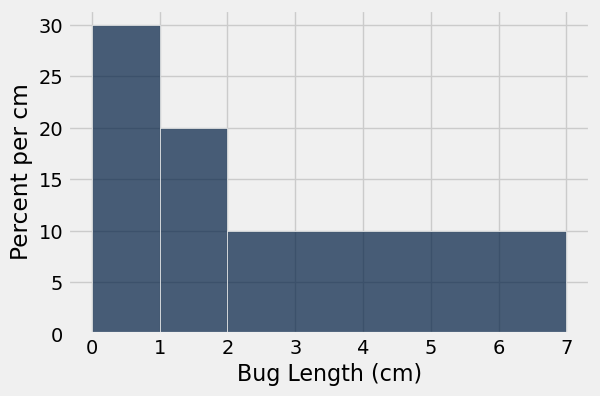

In [20]:
bugs = Table().with_columns("Bug Length", make_array(0.2, 0.4, 0.9, 1.0, 1.3, 2.0, 2.4, 3.0, 4, 5.8))
bugs.hist("Bug Length", unit="cm", bins=make_array(0, 1, 2, 7))

The x-axis is in terms of the units attached to data we are measuring. The y-axis is a measure of density, or percent per unit. Bins are inclusive on the left end and exclusive on the right end. So a bug measured to be exactly 1 cm would go in the middle bin, not the leftmost bin. As in the above histogram, not all bins have to be the same width.

A key takeaway from histograms is the area principle:

$$\text{area of a bar} = \text{percent of all entries that fall in that bin} = \text{height} \times \text{width}$$ 

To convince yourself of why this is true, think about how the units cancel out. For example in the above case, we have 

$$(\text{height units}) \times (\text{width units}) = \frac{\text{percent}}{\text{cm}} \times \text{cm} = \text{percent}$$.

A consequence of the area principle is that the sum of all the area should sum to $100\%$.

A common misconception is that the height of the bar is representative of the percent of data in the bin. Rather, height is a measure of how "crowded" or dense a bin is. For example, in the above histogram, the tallest bar contains $30 \; \frac{\text{percent}}{\text{cm}} \; \times 1 \text{ cm } = 30 \text{ percent}$ of bugs, whereas the shortest bar contains $10 \frac{\text{percent}}{\text{cm}} \times 5 \text{cm} = 50 \text{ percent}$ of bugs.

## Functions

So far we have worked with functions that have been defined for us. We can define our own functions. Below is a function that takes in a number of feet and converts it to the corresponding number of inches.

In [21]:
def ft_to_in(feet):
    """Convert feet to inches"""
    inches = feet * 12
    return inches

- `def` is a word to that tells python we are about to define our own function.
- `ft_to_in(feet)` is the **signature** of the function. It is made up of 2 parts.
    - `ft_to_in` is the **name** of the function
    - `feet` is an **argument** to the function, or what is input into the function when it is called. Functions you define can take in any number of arguments (including zero)
- `"""Convert feet to inches"""` is the **docstring**, a description of what the function does. 

When the function is called, the **body**, or indented block of code under the signature.  will be run. The special instruction `return` is part of the function's body and tells Python to make the value of the function call equal to whatever comes right after `return`. Once python encounters a `return` statement it will stop executing the function body.

We will often want to save the call to a function with an assignment statement so we can refer to it later.

In [22]:
my_height_ft = 6 + 1/3
my_height_in = ft_to_in(my_height_ft)
my_height_in

76.0

Variables defined inside the body of the function do not persist outside of the function.

In [23]:
inches

NameError: name 'inches' is not defined

A common pattern you will see in Data 8 is the use of functions on tabular data with `tbl.apply(function, col1, col2, ...)`. It returns an array of values resulting from applying `function` to each item in the specified column(s).

# Conditional Statements, Iteration, Tables

## Conditional Statements

A **boolean expression** is an operation that evaluates to `True` or `False`.

In [24]:
3 > 9

False

In [25]:
4 == int(4.8)

True

In [26]:
5 != 2 + 4

True

**Conditional statements** are used to control which lines of code run. Conditional statements follow this format:

```
if <if expression>:
    <if body>
elif <elif expression 0>:
    <elif body 0>
elif <elif expression 1>:
    <elif body 1>
...
else:
    <else body>
```

There is always 1 `if`, 0 or more `elif`s, and 0 or 1 `else`s. If one of the boolean expressions following an `if` or `elif` is `True`, the corresponding body is executed and the rest of the conditional statement is skipped. If the `else` is reached, then the corresponding body is run no matter what.

Here's some code that prints my letter grade given my score in the class:

In [27]:
def print_grade(score):
    if score >= 90:
        print('A')
    elif score >= 80:
        print('B')
    elif score >= 70:
        print('C')
    elif score >= 60:
        print('D')
    else:
        print('F')

In [28]:
print_grade(82)

B


Observe the difference between the `print_grade` and `print_grade_buggy`. Why is the behavior different?

In [29]:
def print_grade_buggy(score):
    if score >= 90:
        print('A')
    if score >= 80:
        print('B')
    if score >= 70:
        print('C')
    if score >= 60:
        print('D')
    else:
        print('F')

In [30]:
print_grade_buggy(82)

B
C
D


## Iteration

**Iteration** is useful for executing a block of code repeatedly. There are two uses of iteration you will use in Data 8. The first is iterating through a range of numbers using `np.arange`. 

Observe how the code block is run one time for each of the values in `np.arange(1, 5)`.

In [31]:
for i in np.arange(1, 5):
    print("Knock " * i)

Knock 
Knock Knock 
Knock Knock Knock 
Knock Knock Knock Knock 


The other is iterating through the elements in an array.

In [32]:
names = make_array("Kristen", "Nikil", "Eunice")
for name in names:
    print('Hi,', name)

Hi, Kristen
Hi, Nikil
Hi, Eunice


## Group and Pivot

`tbl.group(column, func)` allows us to aggregate over unique values of a column. Each distinct value in `column` gets its own row.

`tbl.pivot(col1, col2, values, collect)` allows us to each unique value in `col1` has its own column and each unique value in `col2` has its own row.  `values` specifies the data that goes in each cell. `collect` specifies how the data is aggregated. 

The best way to learn about these functions is with the [Table Function Visualizer](https://www.data8.org/interactive_table_functions/).

# Assessing Models

## Hypothesis Testing

A **test** chooses between two views of how data were generated. The views are called **hypotheses**. The test picks the hypothesis that is better supported by the observed data.
1. Observe something strange (doesn’t align with reality).
2. Define the **null hypothesis** and **alternative hypothesis**.
    - Null: Well-defined chance model, able to be simulated under
    - Alternative: Opposes the null, never simulate under alternative hypothesis
3. Define a **test statistic** - a single number to represent outcome of one trial.
    - How do we choose? It depends on the alternative; we want more extreme values of test statistic to lean towards the alternative hypothesis.
4. Compute the observed value of test statistic, leave it alone!
5. Run your simulation under the null hypothesis.
    - Completely ignore alternative hypothesis and observed test statistic.
    - For each trial (we do ~10000 trials), we simulate and then calculate our simulated test statistic.
    - At the end, you’ll have 10000 simulated test statistics.
6. Compare your observed test and simulated statistics (draw a histogram).
    - Compute your **p-value**, or the proportion of times the simulated statistic was as extreme or more extreme than the observed statistic in the direction of the alternative.
7. Conclude your test with an appropriate p-value cutoff.
    - If the p-value is below the cutoff, there is sufficient evidence to reject the null hypothesis.

## Total Variation Distance

**Total variation distance** is a test statistic for categorical data in which there are multiple categories (e.g. school years: freshman, sophomore, junior, senior). It measures the distance between 2 distributions. 
1. For each category, compute the difference in proportions between two distributions
2. Take the absolute value of each difference
3. Sum, and then divide the sum by 2

# A/B Testing

In the previous lab, we focused on testing hypotheses for data that comes from 1 sample. **A/B testing** is a framework used to test whether 2 samples come from the same underlying distribution.
1. Define hypotheses.
2. Define test statistic (often difference in means between 2 categories).
3. Calculate observed statistic.
4. Shuffle the labels of the original sample, find test statistic and repeat.
5. Calculate the p-value.
6. Use the p-value and p-value cutoff to draw a conclusion about the null hypothesis.

# Confidence Intervals

In statistics, we often want to learn about some **parameter** (i.e. property) of a **population**. One way to do this is to conduct a **census**. For example, if the parameter I am interested in is the mean blood pressure of Americans, I could go around and ask every American their blood pressure. This is too hard!

Instead, what researchers typically do is select a random **sample** of individuals to calculate a **statistic**, or an estimate of the parameter. Since the sample is random, so is our statistic. This process is known as statistical **inference**.

A key question is how to deal with the uncertainty that comes with the randomness of our statistic. We can use **confidence intervals** to quantify this uncertainty.

In Data 8, we use a process known as **bootstrapping** to repeatedly simulate sampling from the population. Since our original sample was large and random, it is a reasonable approximation of the population distribution. Therefore, we repeatedly sample *with replacement* with a sample size equal to the size of the original sample. For each resample, we recalculate the sample statistic. Then, for an $n \%$ confidence interval, we take the middle $n \%$ of the resampled data. The `percentile(percentile, array)` function is useful for this.

# Sample Means

## Standard Deviation

**Standard deviation** measures roughly how far the numbers in a dataset are from their average. To calculate standard deviation, find the root mean square of the deviations from the average (carry out the operations from right to left).

In [33]:
arr = make_array(3, 4, 0, 9)
deviations_from_average = arr - np.mean(arr)
square_of_deviations_from_average = deviations_from_average ** 2
mean_square_of_deviations_from_average = np.mean(square_of_deviations_from_average)
sd = mean_square_of_deviations_from_average ** 0.5
sd

3.2403703492039302

Thankfully, `np.std(arr)` can do this process for us.

In [34]:
np.std(arr)

3.2403703492039302

## Standard Units

**Standard units**, often represented with the letter $z$, measure the number of standard deviations a data point is from the mean.

$$z = \frac{\text{value} - \text{average}}{\text{SD}}$$

Converting a list of numbers to standard units makes the mean $0$ and the SD $1$.

## Bounding a Distribution

**Chebyshev's Bounds** says that no matter the shape of the distribution, the proportion of values within the range $k \pm z$ SDs is at least $1 - \frac{1}{k^2}$.

If we know a distribution is **normal**, we can do a lot better than Chevyshev's bounds. The **normal distribution** has some special properties. It is symmetrical about the mean and has **points of inflection** (points where the slope of the curve changes from increasing to decreasing) at exactly 1 SD from the mean in either direction.

The **68-95-99.7 rule** says that if the distribution is normal, then the following applies:
* About $68 \%$ of the data lies within $\pm 1$ SDs from the mean
* About $95 \%$ of the data lies within $\pm 2$ SDs from the mean
* About $99.7 \%$ of the data lies within $\pm 3$ SDs from the mean

## Central Limit Theorem

The **central limit theorem** (CLT) says that the probability distribution of the sum or average of a large random sample drawn with replacement will be roughly normal, regardless of the distribution of the population from which the sample is drawn. 

For example, suppose I am interested in the proportion of coin flips that land heads. Here is the population distribution:

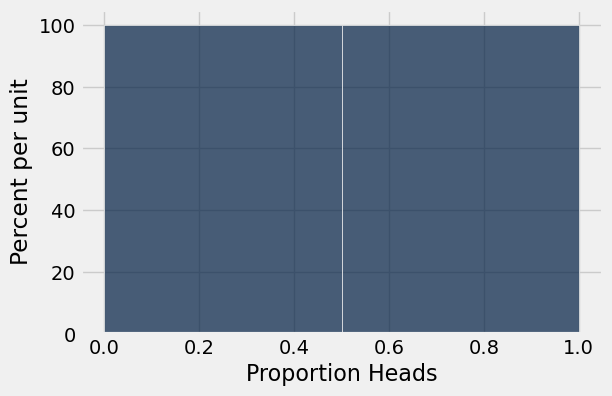

In [35]:
coin = make_array(0, 1)
coin_tbl = Table().with_columns("Proportion Heads", coin)
coin_tbl.hist(bins=make_array(0, 0.5, 1))

Even though this distribution is not normal whatsoever, check out what happens when we repeatedly take flip a coin 100 times and calculate the proportion of heads. This is the CLT in action!

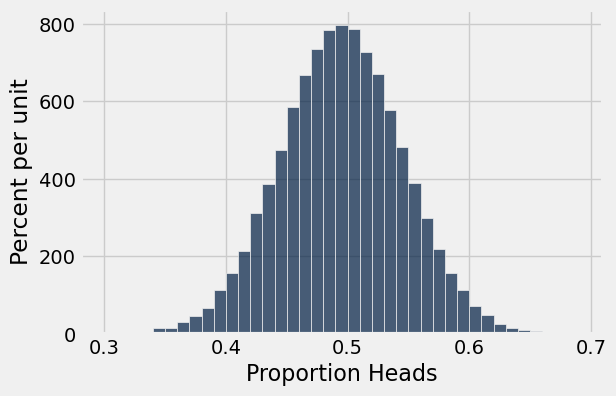

In [36]:
sample_means = make_array()
for i in np.arange(100_000):
    results = np.random.choice(coin, 100)
    prop_heads = np.mean(results)
    sample_means = np.append(sample_means, prop_heads)
    
sample_means_tbl = Table().with_columns("Proportion Heads", sample_means)
sample_means_tbl.hist(bins=np.arange(0.30, 0.70, 0.01))

Often times in statistics, our parameter of interest is the mean of some population. A key question is how much we would expect sample means to vary from sample to sample. This relationship is given by

$$\text{SD of all sample means} = \frac{\text{population SD}}{\sqrt{\text{sample size}}}$$

# Correlation, Association

## Correlation Coefficient

The **correlation coefficient** ($r$) measures the strength of the linear relationship between two variables.
* $-1 \le r \le 1$
* $r = -1$ implies a perfect negative correlation. This means you can draw a straight, downward-sloping line through all the points.
* $r = 0$ implies no correlation. 
* $r = 1$ implies a perfect positive association. This means you can draw a straight, upward-sloping line through all the points.

$r$ is the average of the products between $x$ and $y$, when $x$ and $y$ are expressed in standard units. Because standard units are unitless, $r$ is also unitless. Changing the units of measurement of the data does not affect $r$. Also, switching the axes does no affect $r$.

A high $|r|$ does not imply linear association. In Anscombe's Quartet, all 4 datasets have $r=0.816$, but not all of them have a linear association!

<img src="images/quartet.png" width=600 height=600 class="center"/>

## Regression

In **regression**, we use the value of one variable (which we will call $x$) to predict the value of another (which we will call $y$). The equation of the regression line can be calculated in the following way:

$$\text{slope} = r \cdot \frac{\text{SD of y}}{\text{SD of x}}$$
$$\text{intercept} = \text{average of y} - \text{slope} \cdot \text{average of x}$$

Recall that data in standard units has a mean of $0$ and an SD of $1$. Therefore, when $x$ and $y$ are expressed in standard units, the regression line is given by: 
$$\text{slope} = r$$
$$\text{intercept} = 0$$

# Residuals, Regression Inference

## Residuals

**Residuals** quantify error in estimation. 

$$\text{residual} = \text{actual} - \text{predicted}$$

Residuals are also known as errors. The unique line that minimizes the root mean squared error (RMSE) gives us the regression line. 

**Residuals plots** plot the $x$ values on the horizontal axis against the residuals on the vertical axis.

Consider the following scatter plot and residual plot:

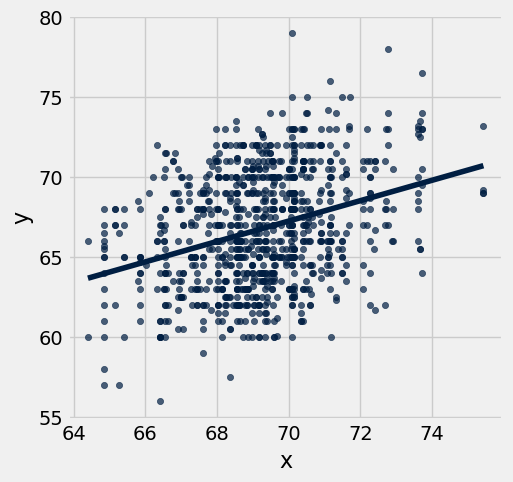

In [37]:
heights = Table.read_table('https://www.inferentialthinking.com/data/family_heights.csv').relabeled("midparentHeight", "x").relabeled("childHeight", "y")
heights.scatter("x", "y", fit_line=True)

Below we graph the residuals plot.

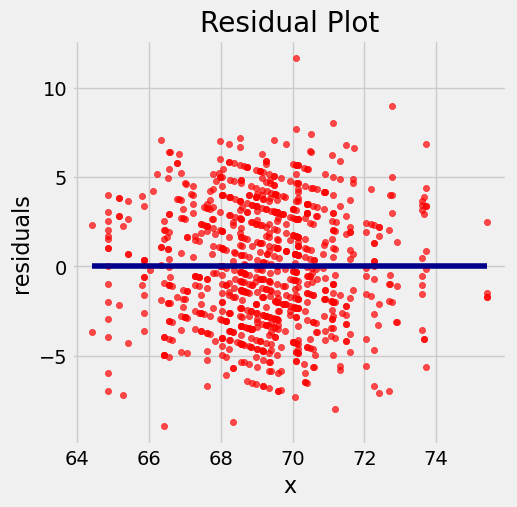

In [38]:
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

def standard_units(x):
    return (x - np.mean(x))/np.std(x)

def correlation(table, x, y):
    x_in_standard_units = standard_units(table.column(x))
    y_in_standard_units = standard_units(table.column(y))
    return np.mean(x_in_standard_units * y_in_standard_units)

def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table.column(y)) -  a * np.mean(table.column(x))

def fit(table, x, y):
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

def residual(table, x, y):
    return table.column(y) - fit(table, x, y)

def residual_plot(table, x, y):
    x_array = table.column(x)
    t = Table().with_columns(
            x, x_array,
            'residuals', residual(table, x, y)
        )
    t.scatter(x, 'residuals', color='r')
    xlims = make_array(min(x_array), max(x_array))
    plots.plot(xlims, make_array(0, 0), color='darkblue', lw=4)
    plots.title('Residual Plot')
    
residual_plot(heights, "x", "y")

Like we see above, the residual plot of a good regression shows no pattern. The residuals look about the same, above and below the horizontal line at 0, across the range of the predictor variable.

Below is an example of a bad linear regression There is a pattern in the residuals, which is evidence that the relationship between $x$ and $y$ is nonlinear.

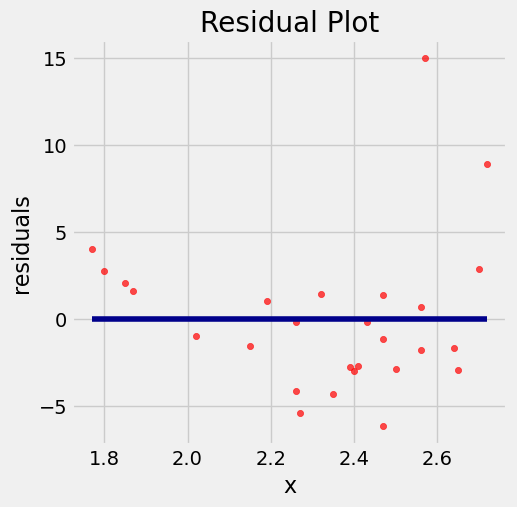

In [39]:
dugongs = Table.read_table('https://www.inferentialthinking.com/data/dugongs.csv').relabeled("Length", "x").relabeled("Age", "y")
residual_plot(dugongs, "x", "y")

If the residual plot shows uneven variation about the horizontal line at 0, the regression estimates are not equally accurate across the range of the predictor variable. This is called **heteroscedasticity**. See the example below.

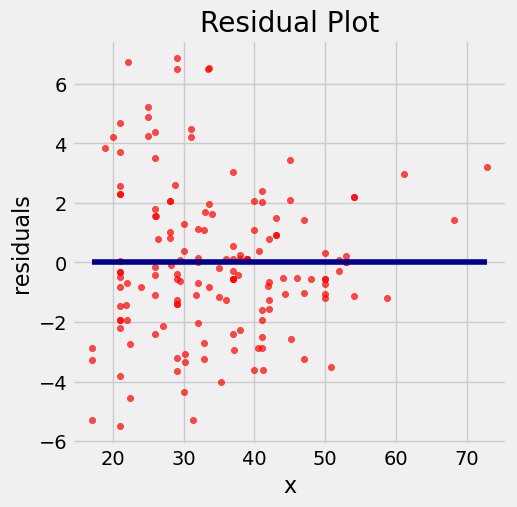

In [40]:
hybrid = Table.read_table('https://www.inferentialthinking.com/data/hybrid.csv').relabeled("mpg", "x").relabeled("acceleration", "y")
residual_plot(hybrid, "x", "y")

When we generate a linear regression model for a dataset, the following statements are true, regardless of whether there is a linear association in the dataset:

1. The mean of the residuals is 0.
2. The SD of the residuals is the RMSE.
3. The residuals are uncorrelated with x.
4. The residuals are uncorrelated with the predictions.

## Regression Inference

In linear regression, we build a regression model based on a random sample of data from a population. What if the true line was flat – that is, there was no linear relation between the two variables – and the association that we observed was just due to randomness in generating the points that form our sample? We can answer that question with a hypothesis test.

Null hypothesis: true slope = 0

Alternative hypothesis: true slope $\ne$ 0

Method:
* Construct a bootstrap confidence interval for the true slope.
* If the interval does not contain 0, reject the null hypothesis.
* If the inverval contains 0, there is not enough evidence to reject the null hypothesis.

# Classification

The goal of a classification algorithm is to predict the **class** of a data point given numerical **features** (i.e. data describing the data point). In the below example, we could build a classifier to predict whether an individual was approved for a loan based on their income and credit score. In this case, income and credit score and features. The classifier will predict one of 2 classes: either true (the individual was able to secure a loan) or false (the individual was not able to secure a loan).


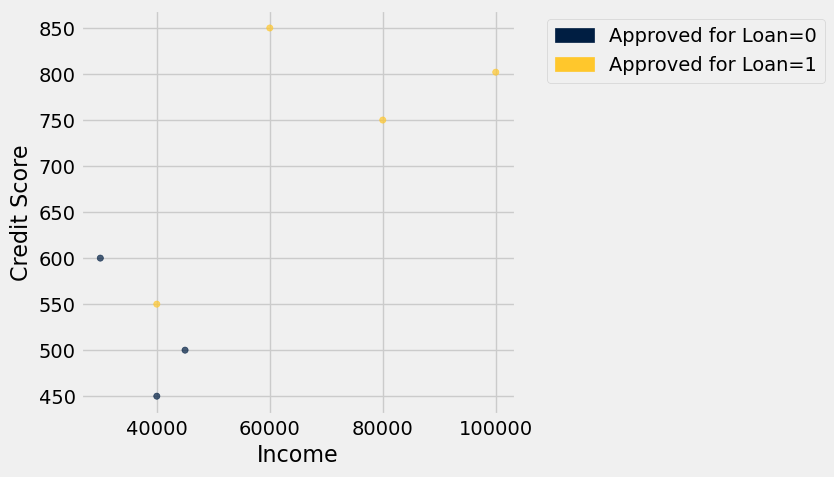

In [41]:
credit = Table().with_columns("Income", make_array(40_000, 45_000, 30_000, 60_000, 100_000, 80_000, 40_000), "Credit Score", make_array(450, 500, 600, 850, 802, 750, 550), "Approved for Loan", make_array(False, False, False, True, True, True, True))
credit.scatter("Income", "Credit Score", group="Approved for Loan")

The **training set** is what we use to build our classifier. The **testing set** is the data used to test the ability of our classifier. A "smart" classifier is able to perform well on data is has never seen before (i.e. the test set). 

## k-Nearest Neighbors (KNN)

**KNN** is one of many classification algortithms. To classify a test point with KNN,

1. Find the distances between the test point and all the training points.
2. Kind the $k$ nearest neighbors of the test point. That is, find the training points with the smallest distances to the test point.
3. Take a majority vote of the $k$ nearest neighbors to determine the class. Assignt the point to the class the winner.

In Data 8, we will build binary classifiers which classify a point as one of two classes. In this case, it is best to choose an odd $k$ so the vote never ends in a tie. 

The **decision boundary** is the boundary where the classifier switches from classifying as one class to the other class. The approximate decision boundary for $k=3$ is drawn below.

![knn](images/knn-decision-boundary.png)

# Updating Probabilities

**Bayes' Rule** is used to make decisions based on incomplete information, incorporating new information as it comes in. 

Suppose if someone has a disease, the probability they test positive is $99\%$. If they don't, the probability they get a false positive is $0.5\%$. Suppose $0.4\%$ of the population has the disease.

A good way to visualize these problems is with a tree diagram.

<img src="images/tree.png" width=600 height=600 class="center"/>

A person is picked at random from the population and tested. What is the probability that they have the disease?

$$P(\text{disease, given a positive test}) = \frac{P(\text{disease and positive test})}{P(\text{positive test})} = \frac{P(\text{disease and positive test})}{P(\text{disease and positive test}) + P(\text{disease and negative test})} = \frac{0.004 \cdot 0.99}{0.004 \cdot 0.99 + 0.996 \cdot 0.005} = 0.44$$

Even though our test is very accurate, since the disease is so rare, a positive test result is more likely to be a false positive than a true positive! 

The above calculation is an application of Bayes' rule:

$$P(\text{B | A}) = \frac{P(\text{A and B})}{P(\text{A})}$$

You can think of the vertical bar symbol to mean "given".

In the above example, before we knew the test result, the probability that a random person had the disease was $0.4\%$. This is known as the **prior probability**. The **likelihoods** are the probability of a test result, considering whether the person has a disease. Finally, the **posterior probability** is the probability that an indiividual has the disease, *given that we know the test result*. In Data 8, you don't need to know this voabulaty. It's best to focus on the intuition behind the situation and draw out the tree diagram.